In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("employee_train.csv")

In [3]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


# EDA

In [4]:
df.shape

(22750, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [6]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [7]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [8]:
df.dropna(subset=['Burn Rate'],inplace = True)

In [9]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate                  0
dtype: int64

In [10]:
df.dropna(subset=['Mental Fatigue Score','Resource Allocation'],inplace = True)

In [11]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [12]:
df.shape

(18590, 9)

In [13]:
company_count = df['Company Type'].value_counts()
company_count

Company Type
Service    12174
Product     6416
Name: count, dtype: int64

In [14]:
designation_count = df['Designation'].value_counts()
designation_count

Designation
2.0    6214
3.0    4920
1.0    3954
4.0    1947
0.0    1238
5.0     317
Name: count, dtype: int64

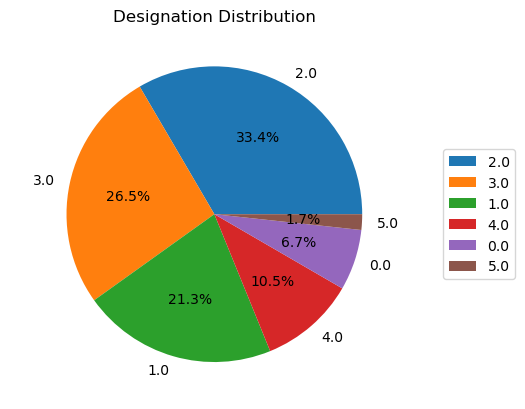

In [15]:
fig,ax = plt.subplots()
designation_count.plot(kind='pie',ax=ax,autopct='%1.1f%%',legend = True)
ax.legend(loc='center left',bbox_to_anchor=(1.1,0.5))
plt.title('Designation Distribution')
plt.ylabel(' ')
plt.show()

In [16]:
fatigue = df['Mental Fatigue Score'].value_counts()
fatigue

Mental Fatigue Score
6.0    429
5.9    413
6.3    410
6.1    406
5.8    406
      ... 
0.2     20
0.6     20
0.4     15
0.1     13
0.3     11
Name: count, Length: 101, dtype: int64

In [17]:
gender_count = df['Gender'].value_counts()
gender_count

Gender
Female    9747
Male      8843
Name: count, dtype: int64

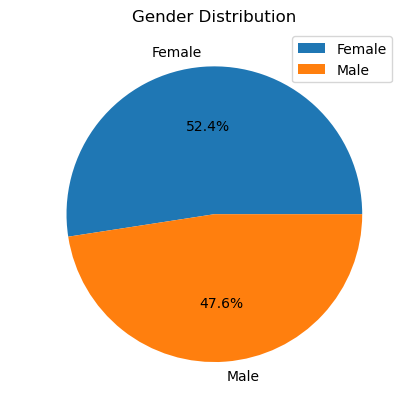

In [18]:
gender_count.plot(kind='pie',autopct='%1.1f%%',legend =True)
plt.title("Gender Distribution")
plt.ylabel(" ")
plt.show()

In [19]:
WFH_count = df['WFH Setup Available'].value_counts()
WFH_count

WFH Setup Available
Yes    10030
No      8560
Name: count, dtype: int64

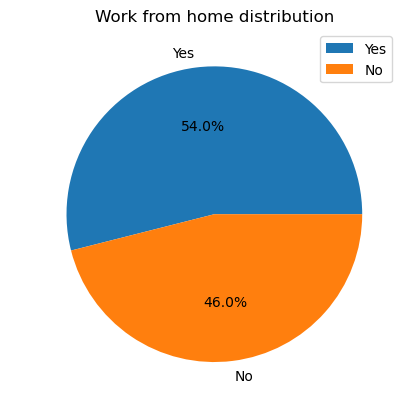

In [20]:
WFH_count.plot(kind='pie',autopct='%1.1f%%',legend=True)
plt.title("Work from home distribution")
plt.ylabel(' ')
plt.show()

One hot encoding
1.Gender
2.Company Type
3.WFH setup 

In [21]:
cols = ['Gender','Company Type','WFH Setup Available']
encoder = OneHotEncoder(sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[('onehot',encoder,cols)
                 ],
remainder = 'passthrough')

df_=preprocessor.fit_transform(df)

one_hot_cols = preprocessor.named_transformers_['onehot'].get_feature_names_out(cols)
all_cols = one_hot_cols.tolist()+df.drop(columns=cols).columns.tolist()
df_new = pd.DataFrame(df_,columns=all_cols)

print(df_new)

      Gender_Female Gender_Male Company Type_Product Company Type_Service  \
0               1.0         0.0                  0.0                  1.0   
1               0.0         1.0                  0.0                  1.0   
2               0.0         1.0                  0.0                  1.0   
3               1.0         0.0                  0.0                  1.0   
4               0.0         1.0                  1.0                  0.0   
...             ...         ...                  ...                  ...   
18585           1.0         0.0                  1.0                  0.0   
18586           0.0         1.0                  1.0                  0.0   
18587           1.0         0.0                  1.0                  0.0   
18588           1.0         0.0                  0.0                  1.0   
18589           0.0         1.0                  1.0                  0.0   

      WFH Setup Available_No WFH Setup Available_Yes  \
0                  

In [22]:
df_new.head()

,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Employee ID,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,1.0,0.0,0.0,1.0,1.0,0.0,fffe32003000360033003200,2008-09-30,2.0,3.0,3.8,0.16
1,0.0,1.0,0.0,1.0,0.0,1.0,fffe3700360033003500,2008-11-30,1.0,2.0,5.0,0.36
2,0.0,1.0,0.0,1.0,0.0,1.0,fffe32003400380032003900,2008-11-03,1.0,1.0,2.6,0.2
3,1.0,0.0,0.0,1.0,1.0,0.0,fffe31003900340031003600,2008-07-24,3.0,7.0,6.9,0.52
4,0.0,1.0,1.0,0.0,0.0,1.0,fffe3300350037003500,2008-11-26,2.0,4.0,3.6,0.29


In [23]:
df_new.drop('Date of Joining',axis=1,inplace=True)

In [24]:
df_new.sample(5)

,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Employee ID,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
10236,1.0,0.0,1.0,0.0,1.0,0.0,fffe33003000350039003800,2.0,4.0,5.4,0.39
16475,0.0,1.0,0.0,1.0,0.0,1.0,fffe32003700320031003800,2.0,2.0,4.4,0.29
4935,0.0,1.0,0.0,1.0,1.0,0.0,fffe3600300033003900,2.0,4.0,6.2,0.54
4420,1.0,0.0,0.0,1.0,1.0,0.0,fffe31003100390035003900,3.0,8.0,8.1,0.82
9063,0.0,1.0,1.0,0.0,0.0,1.0,fffe3700360030003900,5.0,10.0,9.9,1.0


In [25]:
df_new.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


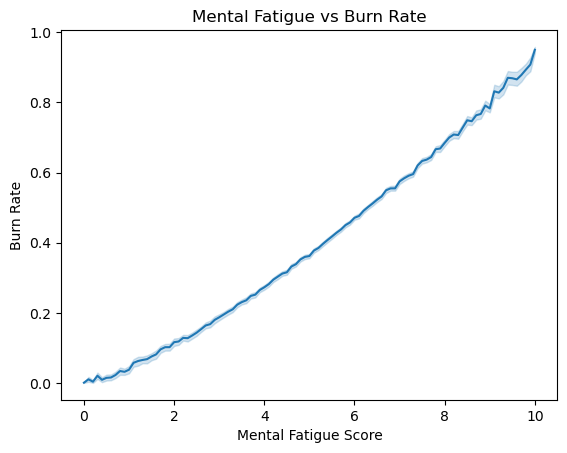

In [26]:
sn.lineplot(x='Mental Fatigue Score',y='Burn Rate',data=df_new)
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Burn Rate')
plt.title('Mental Fatigue vs Burn Rate')
plt.show()

In [27]:
data = df_new.drop('Employee ID',axis=1)

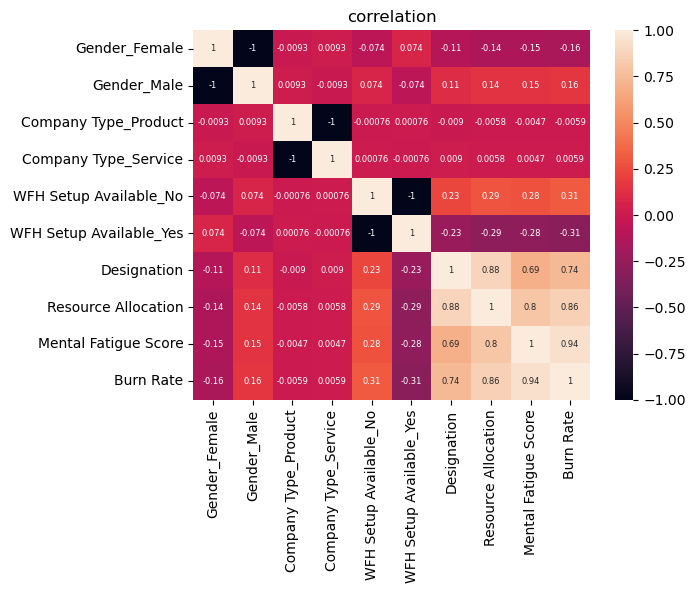

In [28]:
sn.heatmap(data.corr(),annot=True,annot_kws={"fontsize":6})
plt.title('correlation')
plt.show()

Heat map interpretation:-
1: Perfect positive correlation
if this variable increase the other also increase

-1:Perfect negative correlation
if this variable increases the other decreases

0:No correlation
no linear rellationship


# Data splitting

In [29]:
X = df_new.drop('Burn Rate',axis=1)

In [30]:
X.head()

,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Employee ID,Designation,Resource Allocation,Mental Fatigue Score
0,1.0,0.0,0.0,1.0,1.0,0.0,fffe32003000360033003200,2.0,3.0,3.8
1,0.0,1.0,0.0,1.0,0.0,1.0,fffe3700360033003500,1.0,2.0,5.0
2,0.0,1.0,0.0,1.0,0.0,1.0,fffe32003400380032003900,1.0,1.0,2.6
3,1.0,0.0,0.0,1.0,1.0,0.0,fffe31003900340031003600,3.0,7.0,6.9
4,0.0,1.0,1.0,0.0,0.0,1.0,fffe3300350037003500,2.0,4.0,3.6


In [31]:
Y = df_new['Burn Rate']
Y.head()

0    0.16
1    0.36
2    0.20
3    0.52
4    0.29
Name: Burn Rate, dtype: float64

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [33]:
print(X_train.shape,X_test.shape)

(13013, 10) (5577, 10)


In [34]:
X_train.head()

,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Employee ID,Designation,Resource Allocation,Mental Fatigue Score
15733,1.0,0.0,0.0,1.0,1.0,0.0,fffe32003400360035003600,3.0,8.0,7.7
10431,0.0,1.0,0.0,1.0,0.0,1.0,fffe32003200330037003100,4.0,7.0,6.5
7889,0.0,1.0,0.0,1.0,1.0,0.0,fffe32003300340031003400,2.0,5.0,7.6
7708,1.0,0.0,0.0,1.0,0.0,1.0,fffe33003000370035003300,2.0,5.0,4.7
6913,0.0,1.0,0.0,1.0,1.0,0.0,fffe33003200350030003200,2.0,4.0,7.8


In [35]:
Y_train.head()

15733    0.73
10431    0.56
7889     0.58
7708     0.38
6913     0.58
Name: Burn Rate, dtype: float64

In [36]:
X_train = X_train.drop('Employee ID',axis=1)

# Linear Regression

In [37]:
model1 = LinearRegression()

In [38]:
EMP_ID = X_test['Employee ID']
X_test = X_test.drop('Employee ID',axis=1)

In [39]:
model1.fit(X_train,Y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = model1.score(X_test,Y_test)

In [40]:
accuracy1

0.9206064766804504

In [41]:
r2_score1 = r2_score(Y_test,y_pred1)*100
r2_score1

92.06064766804504

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 
mae1 = mean_absolute_error(y_true = Y_test,y_pred = y_pred1)
mse1 = mean_squared_error(y_true = Y_test,y_pred = y_pred1)
rmse1 = mean_squared_error(y_true=Y_test,y_pred=y_pred1,squared = False)
#if squared = True it will return mse1 value

print("mae of linear regregression",mae1)
print("mse of linear regregression",mse1)
print("rmse of linear regregression",rmse1)

mae of linear regregression 0.04552119438270913
mse of linear regregression 0.003071758272220969
rmse of linear regregression 0.055423445149331604


# Randon Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100,criterion='poisson')
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = model2.score(X_test,Y_test)

In [44]:
accuracy2

0.9113632623125486

In [45]:
mae2 = mean_absolute_error(y_true = Y_test,y_pred = y_pred2)
mse2 = mean_squared_error(y_true = Y_test,y_pred = y_pred2)
rmse2 = mean_squared_error(y_true=Y_test,y_pred=y_pred1,squared = False)
#if squared = True it will return mse1 value

print("mae of randon forest regregression",mae2)
print("mse of randon forest regregression",mse2)
print("rmse of randon forest regregression",rmse2)

mae of randon forest regregression 0.04640532349211917
mse of randon forest regregression 0.0034293808969561856
rmse of randon forest regregression 0.055423445149331604


In [46]:
r2_score2 = r2_score(Y_test,y_pred2)*100
r2_score2

91.13632623125486

# xgboost

In [47]:
!pip install xgboost

In [48]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train,label=Y_train)
dtest = xgb.DMatrix(X_test,label=Y_test)
parameters = {
    'objective': 'reg:squarederror',
    'eval_metric':'rmse',
    'max_depth':8,
    'learning_rate':0.7
}

model3 = xgb.train(parameters,dtrain,num_boost_round=100)
y_pred3 = model3.predict(dtest)

mae3 = mean_absolute_error(Y_test, y_pred3)
mse3 = mean_squared_error(Y_test, y_pred3)
rmse3 = np.sqrt(mse3)

print("mae of xgboost",mae3)
print("mse of xgboost",mse3)
print("rmse of xgboost",rmse3)

mae of xgboost 0.04772536343116758
mse of xgboost 0.00360641033105502
rmse of xgboost 0.060053395666315325


In [49]:
r2_score3 = r2_score(Y_test,y_pred3)*100
r2_score3

90.67877100526339

# Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor()
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = model4.score(X_test,Y_test)
accuracy4.mean()

0.8993810443681496

In [51]:
r2_score4 = r2_score(Y_test,y_pred4)*100
r2_score4

89.93810443681495

# KNeighbour Regressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor
model5 = KNeighborsRegressor(n_neighbors=100)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)
accuracy5 = model5.score(X_test,Y_test)
accuracy5

0.9200796059663406

In [53]:
r2_score5 = r2_score(Y_test,y_pred5)*100
r2_score5

92.00796059663406

# Comaprison among models

In [54]:
from tabulate import tabulate

In [55]:
table = []
table.append(['sl.no.','Model','r2_score'])
table.append(['1','Linear Regression',r2_score1])
table.append(['2','Random Forest Regressor',r2_score2])
table.append(['3','xgboost',r2_score3])
table.append(['4','Decision Tree Regressor',r2_score4])
table.append(['5','KNeighborsRegressor',r2_score5])

In [56]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════╤═════════════════════════╤════════════╕
│   sl.no. │ Model                   │   r2_score │
╞══════════╪═════════════════════════╪════════════╡
│        1 │ Linear Regression       │    92.0606 │
├──────────┼─────────────────────────┼────────────┤
│        2 │ Random Forest Regressor │    91.1363 │
├──────────┼─────────────────────────┼────────────┤
│        3 │ xgboost                 │    90.6788 │
├──────────┼─────────────────────────┼────────────┤
│        4 │ Decision Tree Regressor │    89.9381 │
├──────────┼─────────────────────────┼────────────┤
│        5 │ KNeighborsRegressor     │    92.008  │
╘══════════╧═════════════════════════╧════════════╛


# Test data EDA

In [57]:
test = pd.read_csv("employee_test.csv")

In [58]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [59]:
EMP_ID = test['Employee ID'].values
EMP_ID

array(['fffe31003300390039003000', 'fffe31003300310037003800',
       'fffe33003400380035003900', ..., 'fffe31003800340039003000',
       'fffe32003600380031003800', 'fffe32003100390037003800'],
      dtype=object)

In [60]:
EMP_ID.shape

(12250,)

In [61]:
test.shape

(12250, 8)

In [62]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [63]:
cols = ['Gender','Company Type','WFH Setup Available']
encoder_test = OneHotEncoder(sparse_output=False)
preprocessor_test = ColumnTransformer(
    transformers=[('onehot_test',encoder_test,cols)
                 ],
remainder = 'passthrough')

df_test=preprocessor_test.fit_transform(test)

one_hot_cols = preprocessor_test.named_transformers_['onehot_test'].get_feature_names_out(cols)
all_cols = one_hot_cols.tolist()+test.drop(columns=cols).columns.tolist()
df_new_test = pd.DataFrame(df_test,columns=all_cols)

print(df_new_test) 

      Gender_Female Gender_Male Company Type_Product Company Type_Service  \
0               1.0         0.0                  0.0                  1.0   
1               1.0         0.0                  1.0                  0.0   
2               0.0         1.0                  1.0                  0.0   
3               1.0         0.0                  0.0                  1.0   
4               1.0         0.0                  1.0                  0.0   
...             ...         ...                  ...                  ...   
12245           1.0         0.0                  0.0                  1.0   
12246           1.0         0.0                  1.0                  0.0   
12247           0.0         1.0                  0.0                  1.0   
12248           0.0         1.0                  0.0                  1.0   
12249           1.0         0.0                  1.0                  0.0   

      WFH Setup Available_No WFH Setup Available_Yes  \
0                  

In [64]:
df_new_test.head()

,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Employee ID,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score
0,1.0,0.0,0.0,1.0,1.0,0.0,fffe31003300390039003000,2008-12-10,2.0,5.0,7.7
1,1.0,0.0,1.0,0.0,0.0,1.0,fffe31003300310037003800,2008-08-14,1.0,2.0,5.2
2,0.0,1.0,1.0,0.0,0.0,1.0,fffe33003400380035003900,2008-11-13,1.0,3.0,5.9
3,1.0,0.0,0.0,1.0,1.0,0.0,fffe3100370039003200,2008-02-07,3.0,6.0,4.6
4,1.0,0.0,1.0,0.0,1.0,0.0,fffe32003600390036003700,2008-07-17,2.0,5.0,6.4


In [65]:
df_new_test.drop(['Employee ID','Date of Joining'],axis=1,inplace=True)

In [66]:
df_new_test.head()

,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Designation,Resource Allocation,Mental Fatigue Score
0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,5.0,7.7
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,5.2
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,5.9
3,1.0,0.0,0.0,1.0,1.0,0.0,3.0,6.0,4.6
4,1.0,0.0,1.0,0.0,1.0,0.0,2.0,5.0,6.4


In [67]:
df_new_test.shape

(12250, 9)

In [68]:
test_pred = model1.predict(df_new_test)

In [69]:
test_pred

array([0.61797175, 0.34017483, 0.4248064 , ..., 0.81091938, 0.57228645,
       0.11057894])

# Creating output dataframe

In [70]:
output = pd.DataFrame(list(zip(EMP_ID,test_pred)),columns =['Employee ID','Burn Rate'])

In [71]:
output

,Employee ID,Burn Rate
0,fffe31003300390039003000,0.617972
1,fffe31003300310037003800,0.340175
2,fffe33003400380035003900,0.424806
3,fffe3100370039003200,0.412280
4,fffe32003600390036003700,0.521320
...,...,...
12245,fffe3900310034003700,0.407205
12246,fffe32003600330034003000,0.444190
12247,fffe31003800340039003000,0.810919
12248,fffe32003600380031003800,0.572286


In [ ]:
output.to_csv(r'C:\Users\KIIT\Downloads\output.csv',index=False)